# Unsupervised Learning - Supporting File

Credit Card Customer Segmentation

Author: Krishnan Chathadi

## Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Scaling
from scipy.stats import zscore

# Compute distances
from scipy.spatial.distance import cdist, pdist

# K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

## Functions

In [3]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="brown", linestyle="-"
    )  # Add median to the histogram
    plt.show()

## Exploratory Data Analysis

### Import data and get an overview

In [4]:
# Import the data
df_CC_Data = pd.read_excel('Credit Card Customer Data.xlsx')
df_CC_Data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [5]:
# Check the data
df_CC_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


* There are 36275 rows of data with 19 columns.
* There are no missing values.

In [6]:
# Describe the columns
df_CC_Data.describe(include='all').round(2).T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.50,190.67,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.44,25627.77,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.24,37625.49,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.71,2.17,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.40,1.63,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.61,2.94,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.58,2.87,0.0,1.00,3.0,5.00,10.0


In [7]:
# Check for duplicates
df_CC_Data.duplicated().sum()

np.int64(0)

### Univariate Analysis

In [8]:
# Drop Serial number column and customer key
df_CC_Data.drop('Sl_No', axis=1, inplace=True)
df_CC_Data

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3
...,...,...,...,...,...,...
655,51108,99000,10,1,10,0
656,60732,84000,10,1,13,2
657,53834,145000,8,1,9,1
658,80655,172000,10,1,15,0


In [9]:
print('Number of unique customers:', df_CC_Data['Customer Key'].nunique())

# Print duplicated customer IDs
duplicate_ids = df_CC_Data['Customer Key'].value_counts()
duplicate_ids = duplicate_ids[duplicate_ids > 1]

df_multiple_customer_keys = df_CC_Data[df_CC_Data['Customer Key'].isin(duplicate_ids.index)]
df_multiple_customer_keys.sort_values(by='Customer Key', inplace=True)
df_multiple_customer_keys

Number of unique customers: 655


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,37252,6000,4,0,2,8
432,37252,59000,6,2,1,2
332,47437,17000,7,3,1,0
4,47437,100000,6,0,12,3
411,50706,44000,4,5,0,2
541,50706,60000,7,5,2,2
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2
104,97935,17000,2,1,2,10
632,97935,187000,7,1,7,0


In [10]:
print(type(duplicate_ids.index))

<class 'pandas.core.indexes.base.Index'>


In [11]:
# Drop customer key as it is not very relevant to the analysis
df_CC_Data.drop('Customer Key', axis=1, inplace=True)

#### Plot histogram and box plot for all the columns

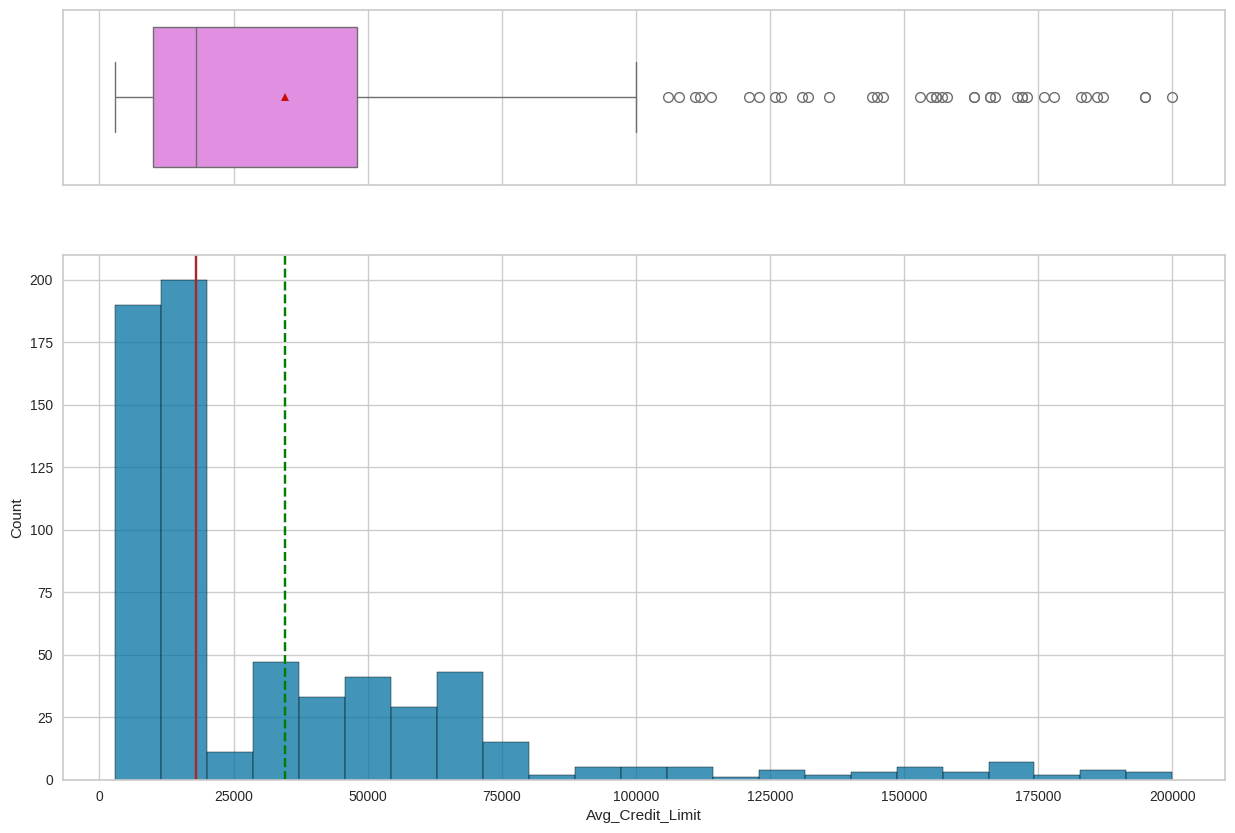

In [12]:
histogram_boxplot(df_CC_Data, 'Avg_Credit_Limit')

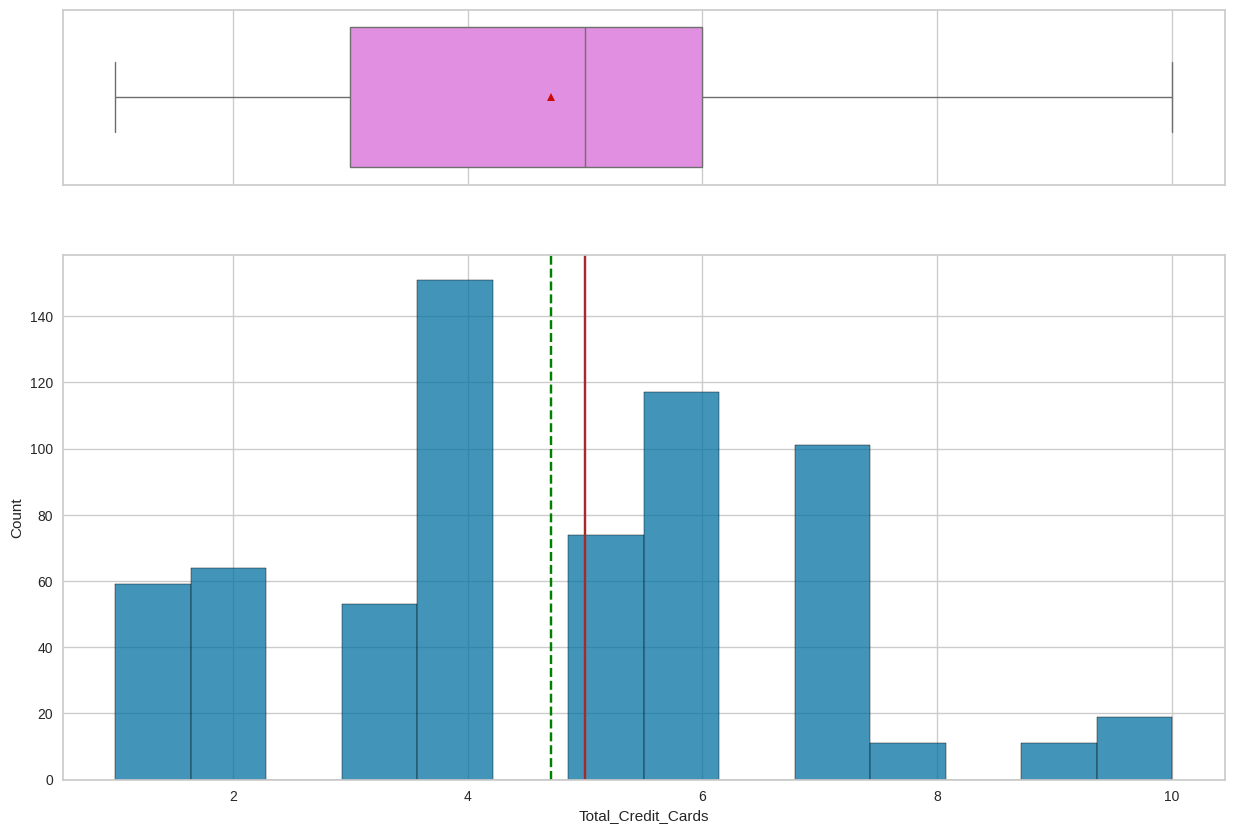

In [13]:
histogram_boxplot(df_CC_Data, 'Total_Credit_Cards')

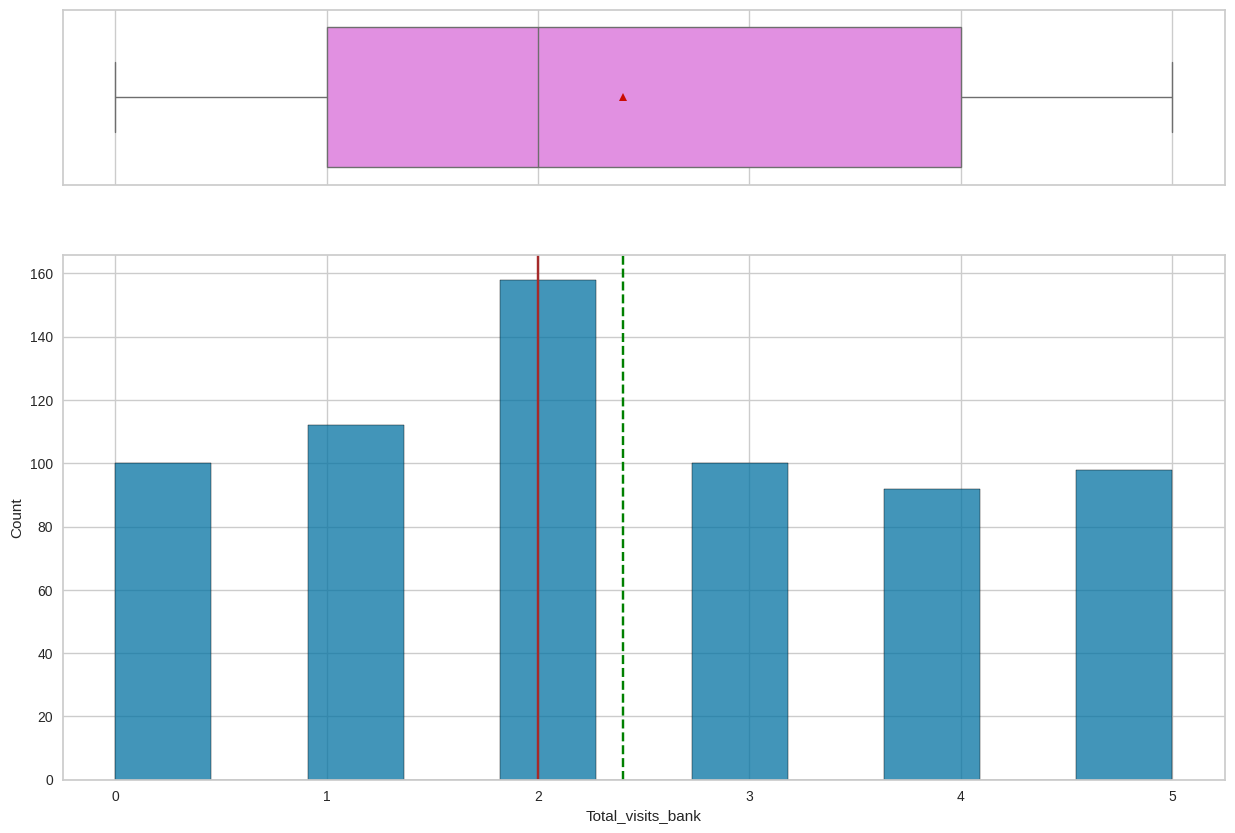

In [14]:
histogram_boxplot(df_CC_Data, 'Total_visits_bank')

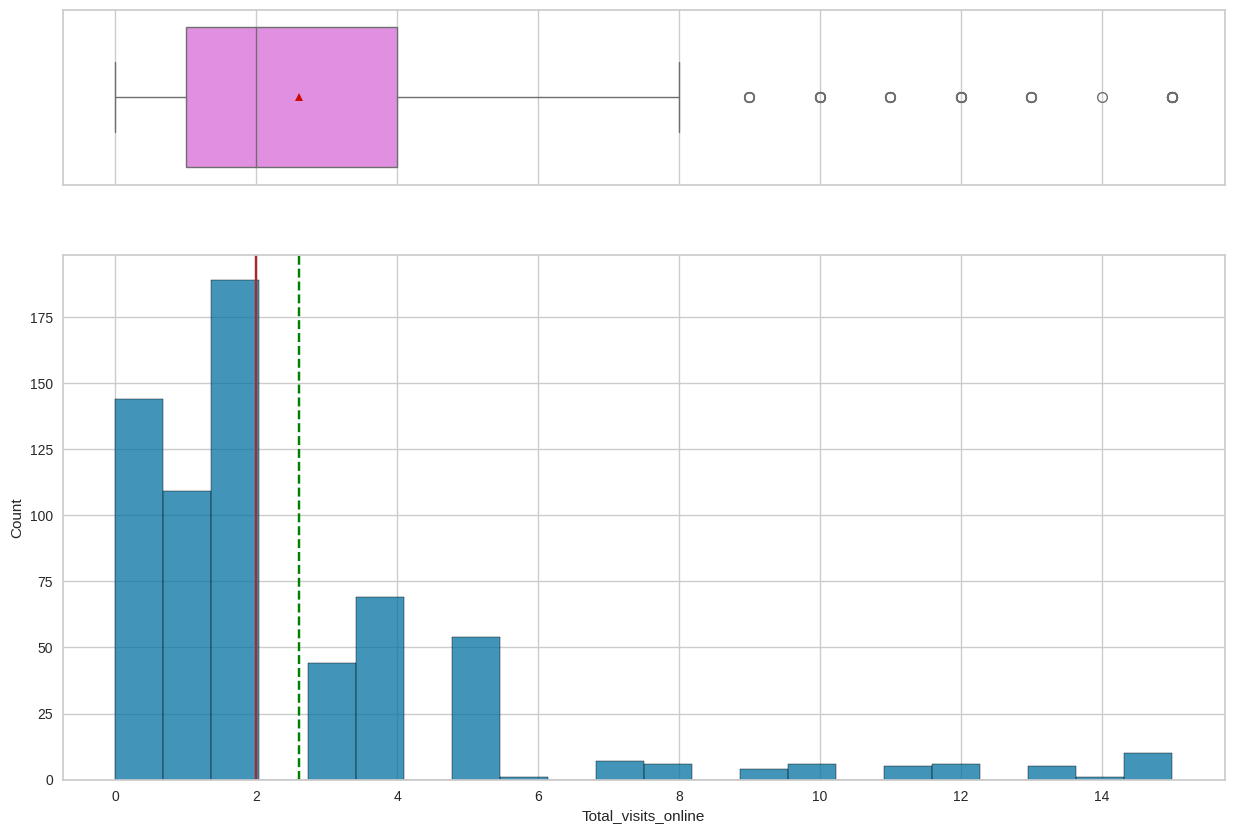

In [15]:
histogram_boxplot(df_CC_Data, 'Total_visits_online')

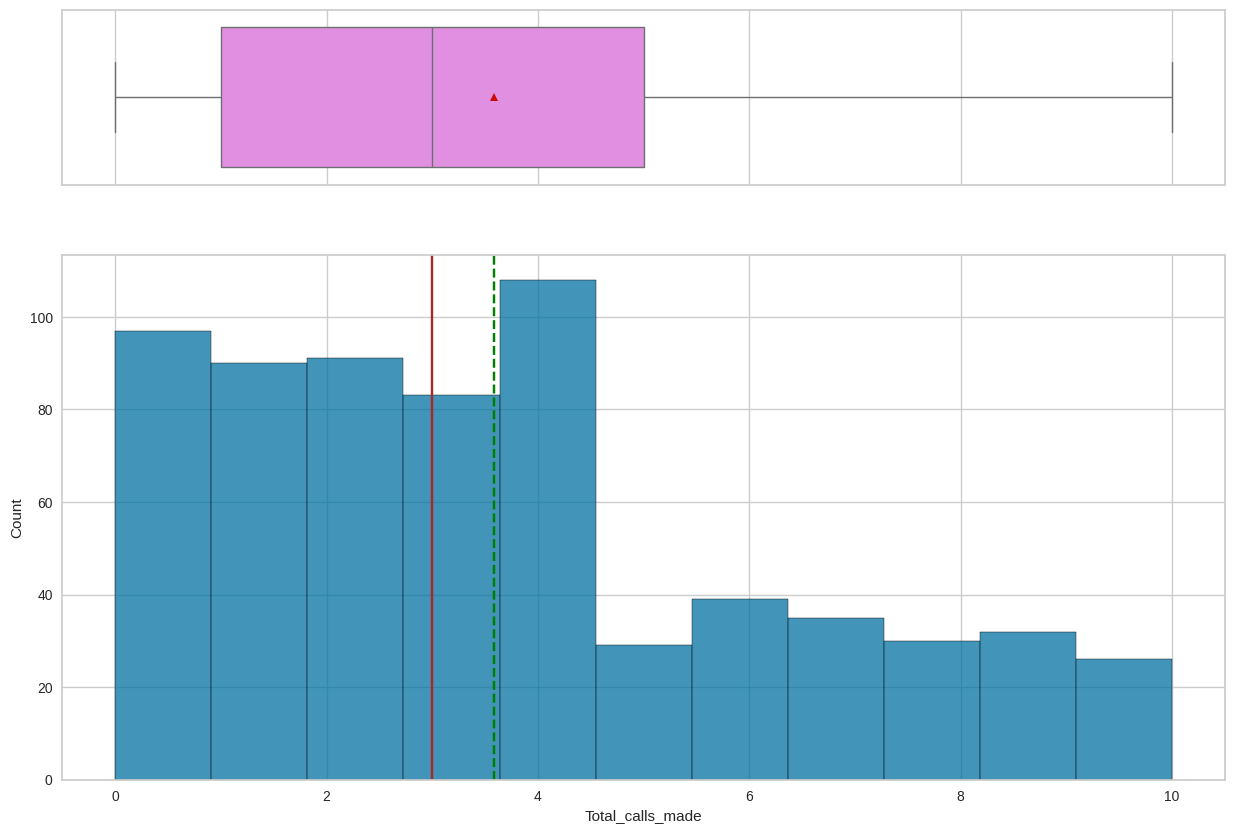

In [16]:
histogram_boxplot(df_CC_Data, 'Total_calls_made')

### Bivariate analysis

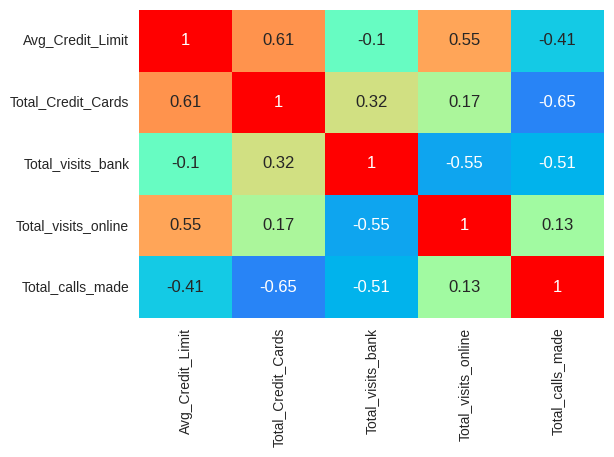

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_CC_Data.corr(), annot=True, vmax=1, vmin=-1, cmap='rainbow', cbar=False )
plt.show()

<Figure size 1200x800 with 0 Axes>

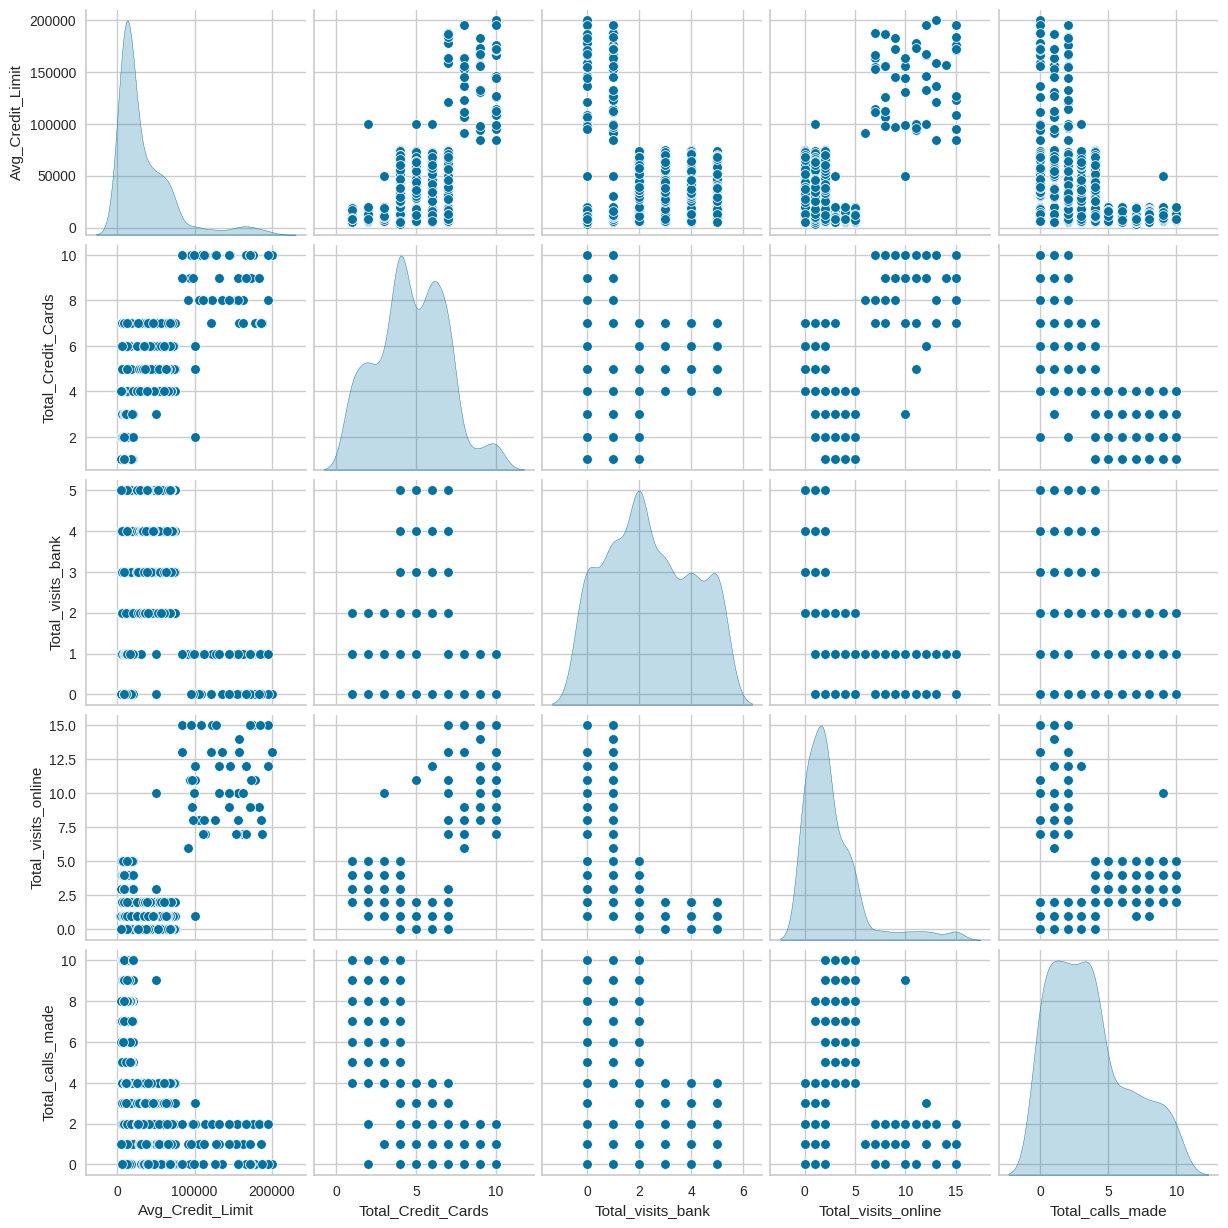

In [18]:
plt.figure(figsize=(12, 8))
sns.pairplot(df_CC_Data, diag_kind='kde')
plt.show()

## Data Preprocessing

### Missing value treatment
There are no missing values.

### Outlier detection and treatment

* The box plots show a few outliers in Total_visits_online and Avg_Credit_Limit.
* The values are reasonable and they need not been treated.

### Feature engineering

* The clustering could be performed without changes to the data. Feature engineering is not necessary.

### Data scaling

* Data will be scaled using Z-score so that one column does not dominate the others.

In [19]:
df_scaled = df_CC_Data.apply(zscore)

## K-Means Clustering

### Apply K-Means clustering and plot the elbow

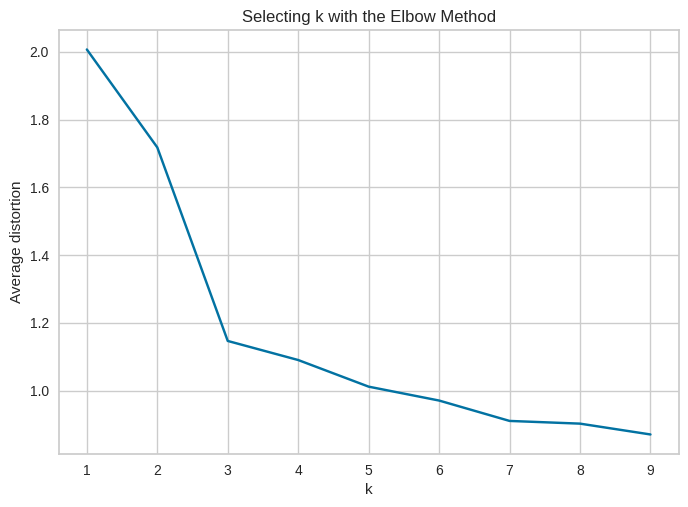

In [20]:
# Plot the elbow
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction=model.predict(df_scaled)
    meanDistortions.append(sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

### Silhouette score

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2717470361089752
For n_clusters = 6, silhouette score is 0.255906765297388
For n_clusters = 7, silhouette score is 0.24868293965236943
For n_clusters = 8, silhouette score is 0.23971066546249942
For n_clusters = 9, silhouette score is 0.23050340837971003


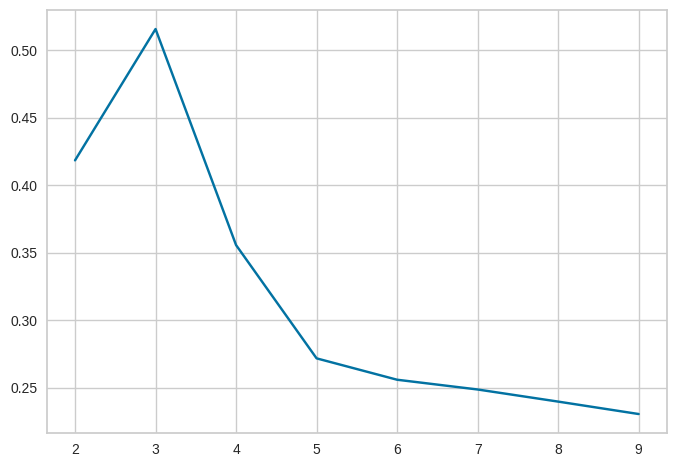

In [21]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((df_scaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(df_scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

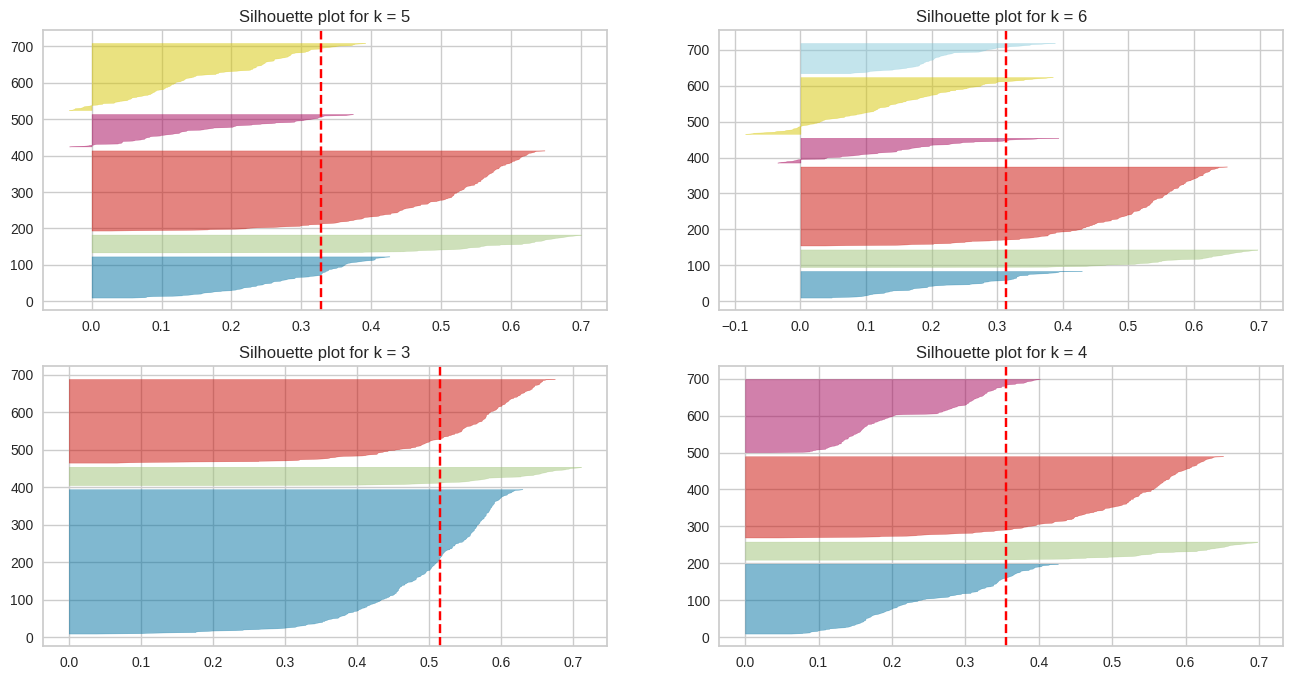

In [22]:
# Silhouette score
fig, ax = plt.subplots(2, 2, figsize=(16,8))
num_clusters = [3, 4, 5, 6]
for i, k in enumerate(num_clusters):
    km = KMeans(n_clusters=k, random_state=10)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km,
                                      colors='yellowbrick',
                                      ax=ax[q-1][mod])
    visualizer.fit(df_scaled)
    ax[q-1][mod].set_title("Silhouette plot for k = " + str(k))

### Final model

In [23]:
# Number of clusters = 3
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(df_scaled)

# adding kmeans cluster labels to the original dataframe
df_CC_Data["K_means_segments"] = kmeans.labels_

### Cluster profiling

In [24]:
cluster_profile = df_CC_Data.groupby("K_means_segments").mean(numeric_only = True)

In [25]:
cluster_profile["count_in_each_segment"] = (
    df_CC_Data.groupby("K_means_segments")['Avg_Credit_Limit'].count().values
)

In [26]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="darkgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


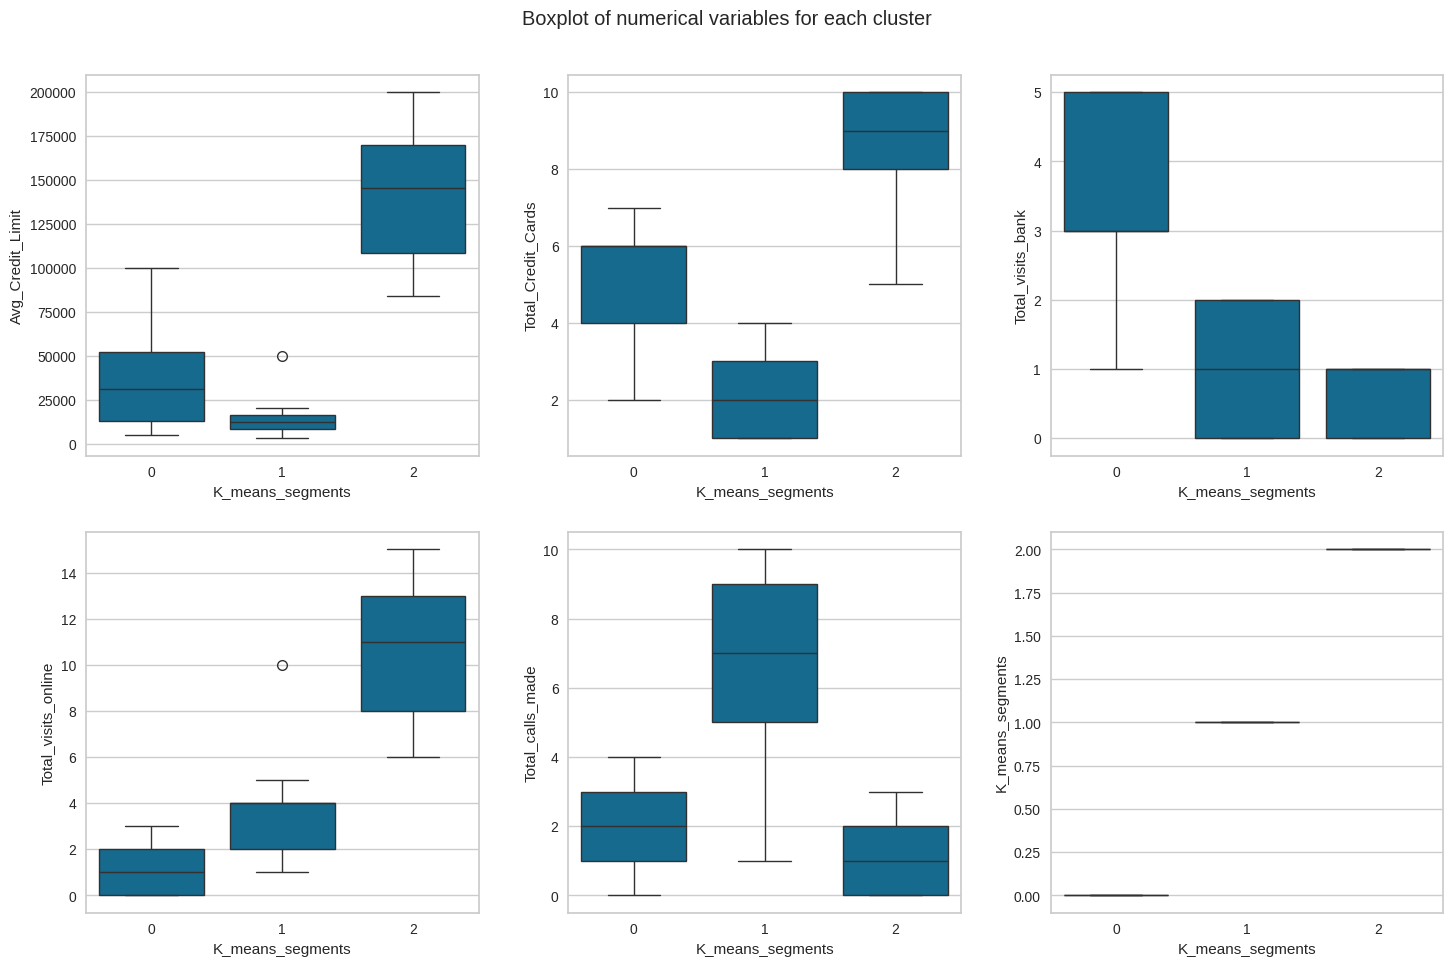

In [27]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(df_CC_Data.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df_CC_Data, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

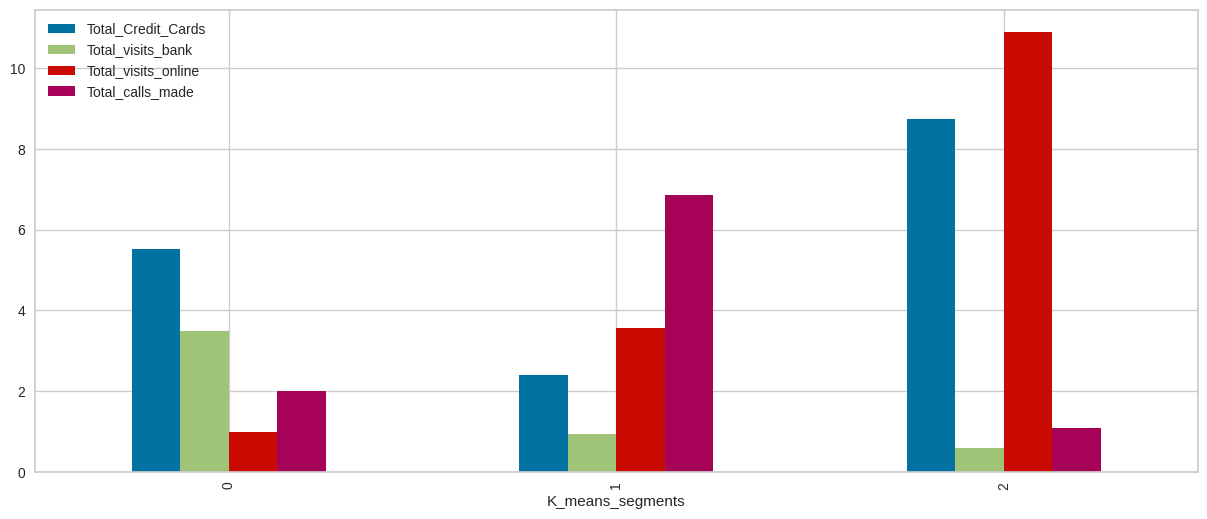

In [28]:
df_CC_Data_no_credit_limit = df_CC_Data.drop('Avg_Credit_Limit', axis=1)
df_CC_Data_no_credit_limit.groupby("K_means_segments").mean(numeric_only = True).plot.bar(figsize=(15, 6));

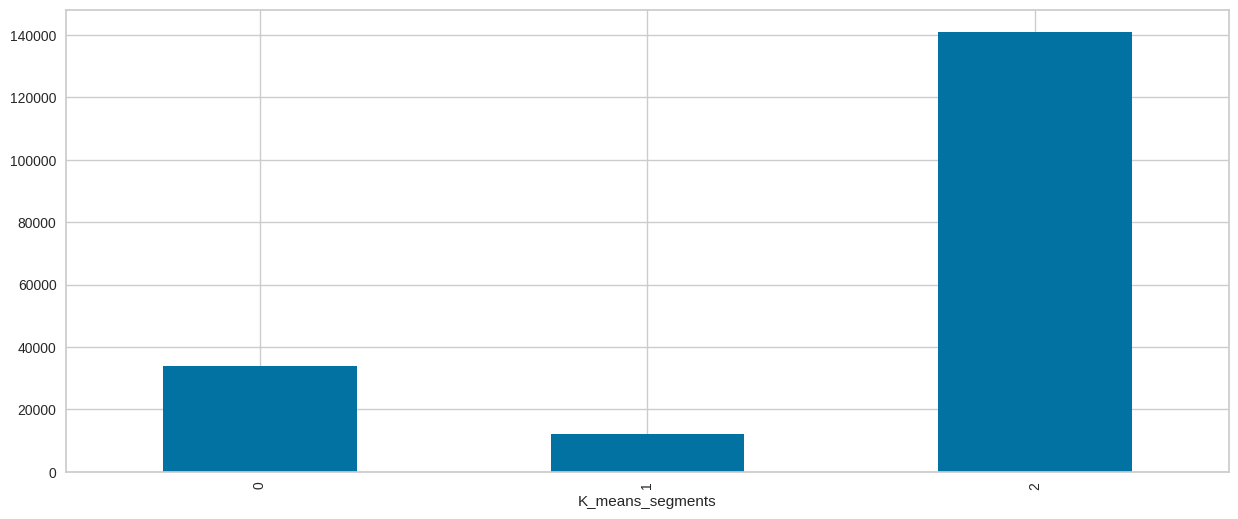

In [29]:
df_CC_Data.groupby("K_means_segments")['Avg_Credit_Limit'].mean().plot.bar(figsize=(15, 6));

## Hierarchical Clustering

### Cophenetic correlation

In [30]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_scaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df_scaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875359.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042136.
Cophenetic co

In [31]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]))

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


In [32]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(df_scaled, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df_scaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


In [33]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print("Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]))

Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage.


### Dendrograms

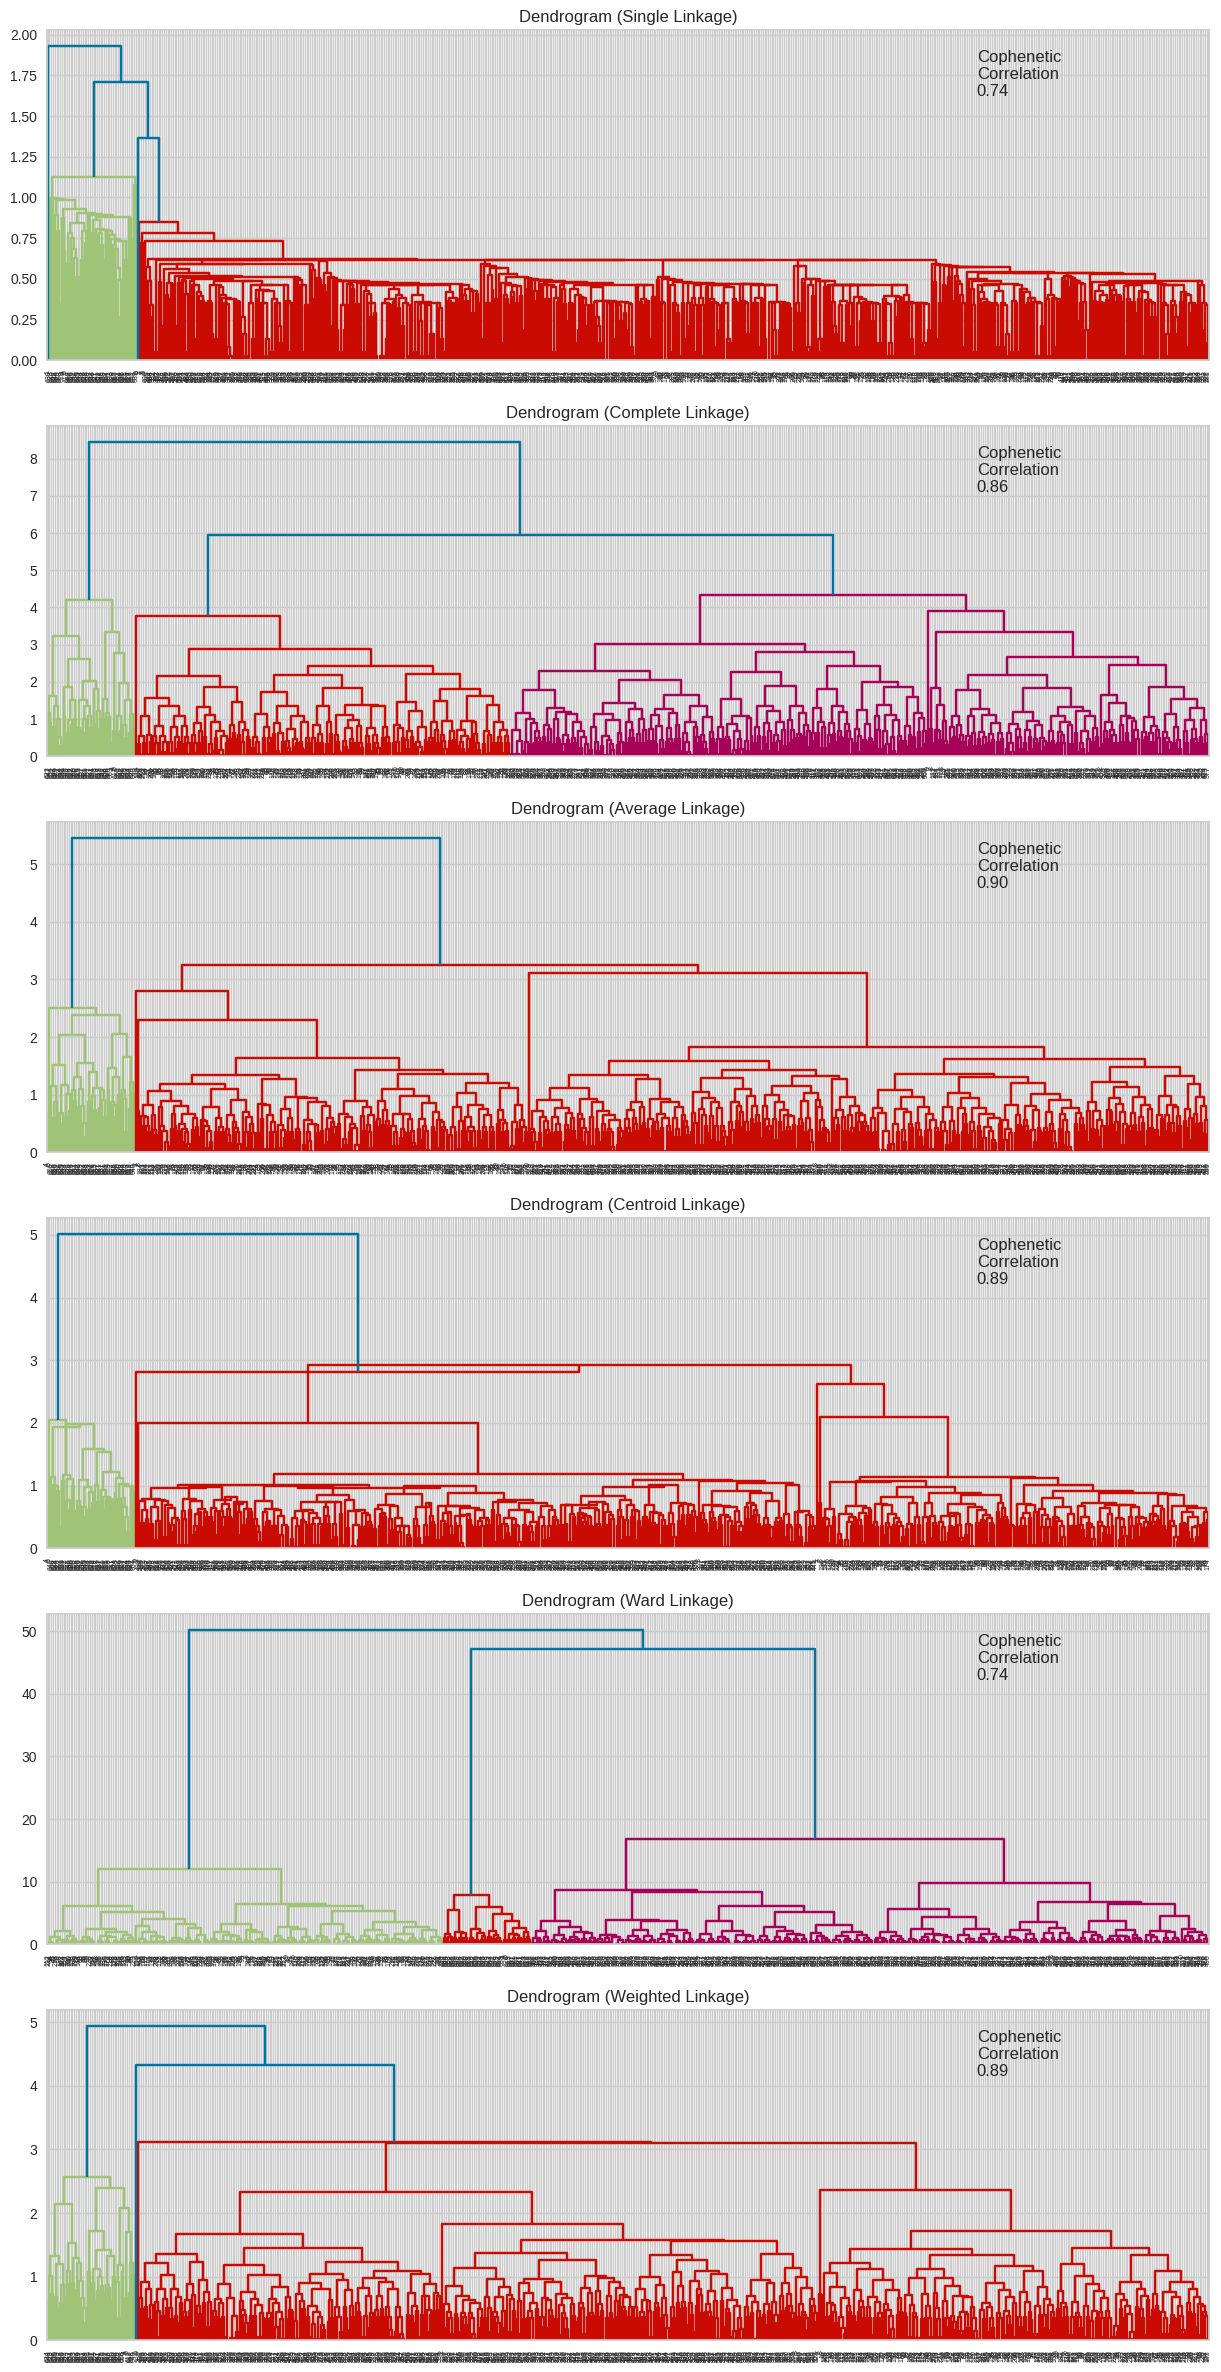

In [34]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

### Final model

In [35]:
hc_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
hc_model.fit(df_scaled)

# adding cluster labels to the original dataframe
df_CC_Data["HC_Clusters"] = hc_model.labels_

### Cluster profiling

In [36]:
cluster_profile_hc = df_CC_Data.groupby("HC_Clusters").mean(numeric_only = True)

In [37]:
cluster_profile_hc.drop('K_means_segments', axis=1, inplace=True)

In [38]:
cluster_profile_hc["count_in_each_segment"] = (
    df_CC_Data.groupby("HC_Clusters")['Avg_Credit_Limit'].count().values
)

In [39]:
# let's display cluster profiles
cluster_profile_hc.style.highlight_max(color="darkgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_Clusters,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,223


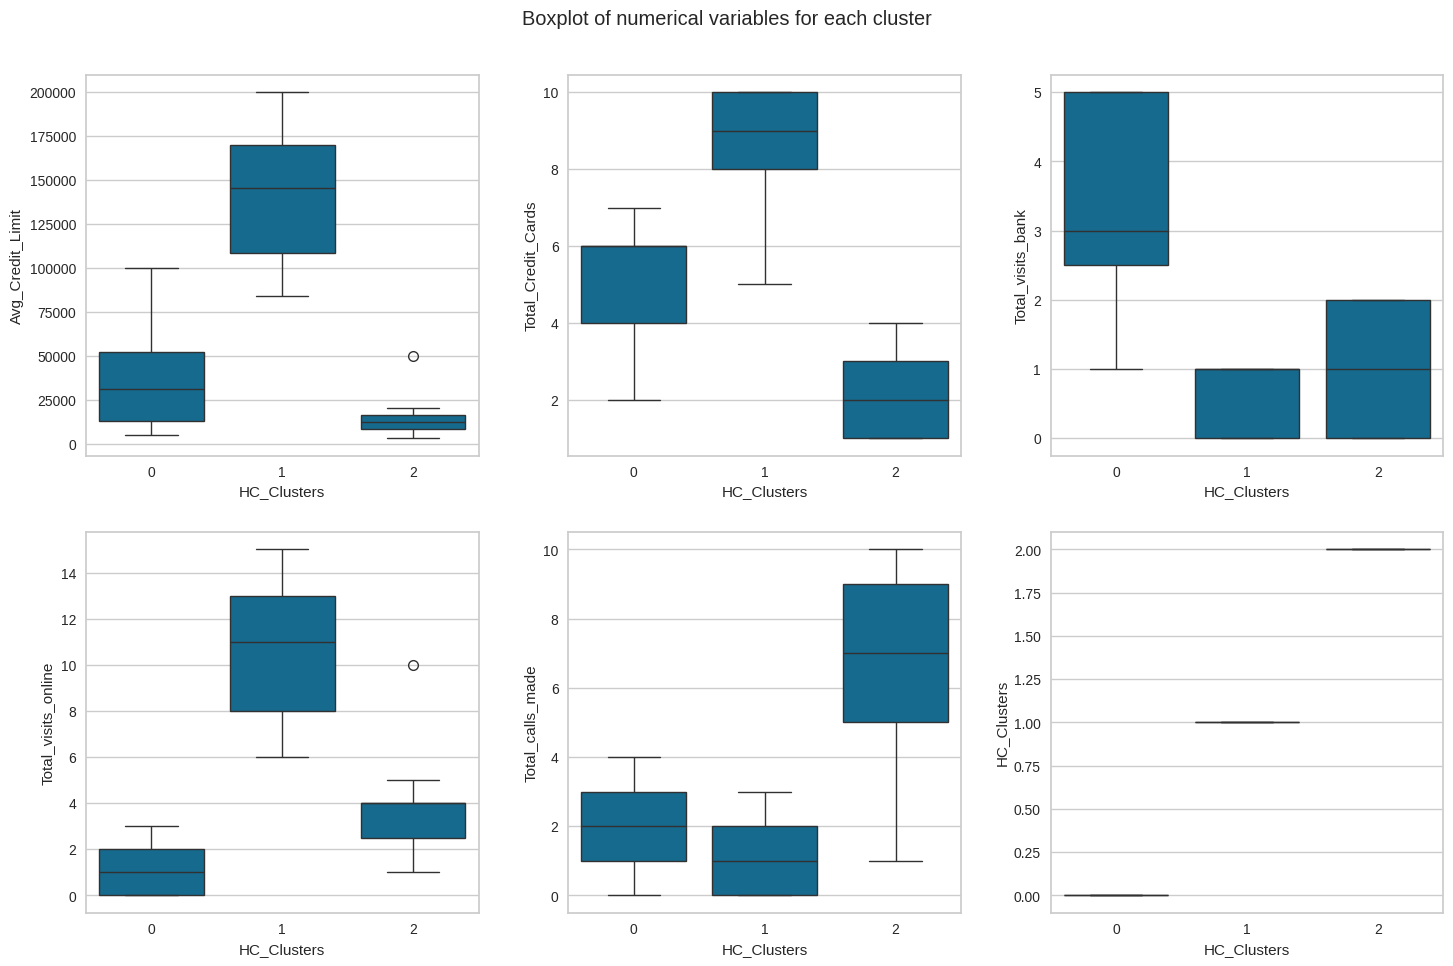

In [40]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

cols = [ col for col in df_CC_Data.columns if col != 'K_means_segments' ]
for i, variable in enumerate(cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df_CC_Data, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

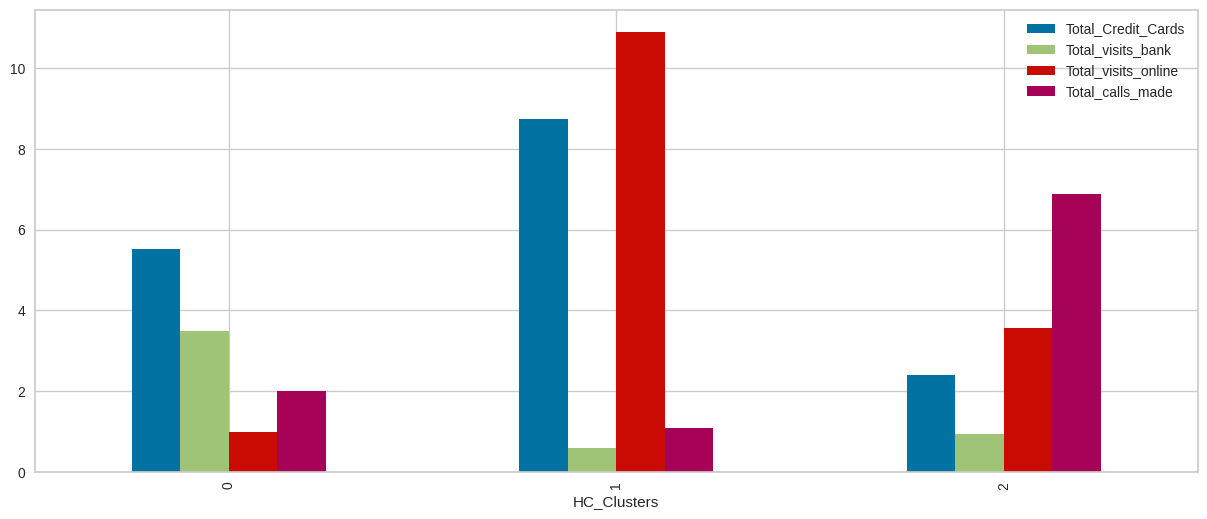

In [41]:
df_CC_Data_no_credit_limit = df_CC_Data.drop(['Avg_Credit_Limit', 'K_means_segments'], axis=1)
df_CC_Data_no_credit_limit.groupby("HC_Clusters").mean(numeric_only = True).plot.bar(figsize=(15, 6));

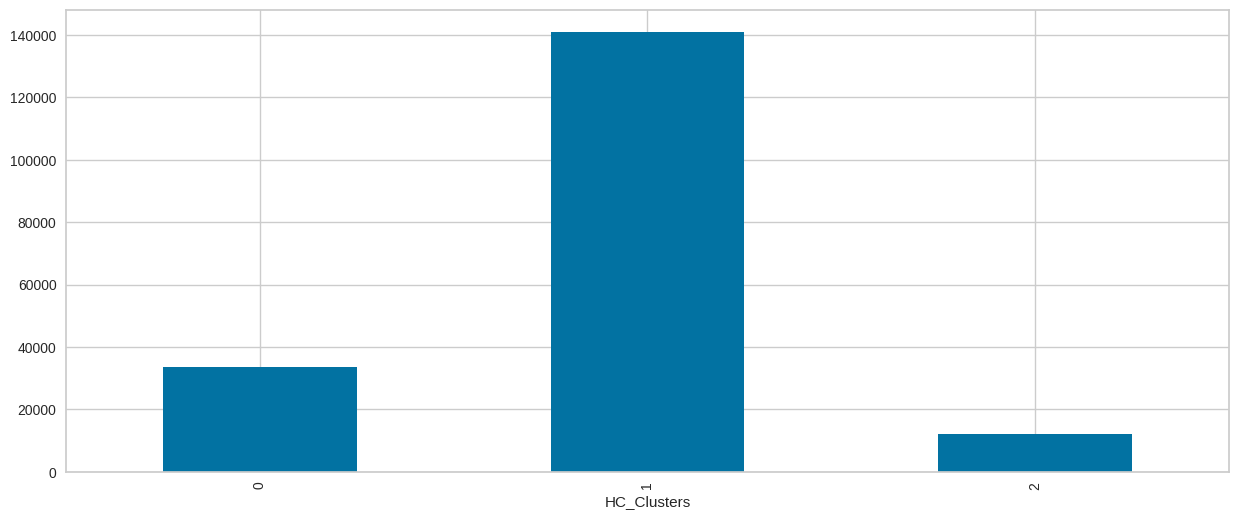

In [42]:
df_CC_Data.groupby("HC_Clusters")['Avg_Credit_Limit'].mean().plot.bar(figsize=(15, 6));

## Comparison of K-Means and Hierarchical clustering

In [43]:
km_mapping = {0: "High_Bank", 1: "High_Calls", 2: "High_CL"}
df_CC_Data["K_means_segments"] = df_CC_Data["K_means_segments"].map(km_mapping)

In [44]:
hc_mapping = {0: "High_Bank", 1: "High_CL", 2: "High_Calls"}
df_CC_Data["HC_Clusters"] = df_CC_Data["HC_Clusters"].map(hc_mapping)

In [45]:
filtered_df = df_CC_Data[df_CC_Data['HC_Clusters'] != df_CC_Data['K_means_segments']]
filtered_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,HC_Clusters
313,7000,4,2,2,4,High_Calls,High_Bank
